In [16]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
# from xgboost import XGBClassifier

#Importing the data
df_credit = pd.read_csv("german_letter.csv")

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
def confusion_matrix_and_visualize(predicted,true_result):
    print("Accuracy is %s" % (accuracy_score(predicted, true_result)*100))
    
    labels = ['0', '1', '2', '3']
    cm = confusion_matrix(predicted, true_result)
#     disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp_1.plot(cmap=plt.cm.Blues)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    #disp.plot(cmap=plt.cm.Blues)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, cmap=plt.cm.Reds)
    
    


In [17]:
#check the column names
df_credit.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'target'],
      dtype='object')

In [18]:
#check the sameple of datafrmae
df_credit[:20]

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,0


In [19]:
# make the dataset numeric
df_credit['Status of existing checking account'] = df_credit['Status of existing checking account'].astype('category')
df_credit['Status of existing checking account'] = df_credit['Status of existing checking account'].cat.codes
df_credit['Duration in month'] = df_credit['Duration in month'].astype('category')
df_credit['Duration in month'] = df_credit['Duration in month'].cat.codes
df_credit['Credit history'] = df_credit['Credit history'].astype('category')
df_credit['Credit history'] = df_credit['Credit history'].cat.codes
df_credit['Purpose'] = df_credit['Purpose'].astype('category')
df_credit['Purpose'] = df_credit['Purpose'].cat.codes
df_credit['Savings account/bonds'] = df_credit['Savings account/bonds'].astype('category')
df_credit['Savings account/bonds'] = df_credit['Savings account/bonds'].cat.codes
df_credit['Present employment since'] = df_credit['Present employment since'].astype('category')
df_credit['Present employment since'] = df_credit['Present employment since'].cat.codes
df_credit['Personal status and sex'] = df_credit['Personal status and sex'].astype('category')
df_credit['Personal status and sex'] = df_credit['Personal status and sex'].cat.codes

df_credit['Other debtors / guarantors'] = df_credit['Other debtors / guarantors'].astype('category')
df_credit['Other debtors / guarantors'] = df_credit['Other debtors / guarantors'].cat.codes
df_credit['Property'] = df_credit['Property'].astype('category')
df_credit['Property'] = df_credit['Property'].cat.codes
df_credit['Other installment plans'] = df_credit['Other installment plans'].astype('category')
df_credit['Other installment plans'] = df_credit['Other installment plans'].cat.codes
df_credit['Housing'] = df_credit['Housing'].astype('category')
df_credit['Housing'] = df_credit['Housing'].cat.codes

df_credit['Job'] = df_credit['Job'].astype('category')
df_credit['Job'] = df_credit['Job'].cat.codes
df_credit['Telephone'] = df_credit['Telephone'].astype('category')
df_credit['Telephone'] = df_credit['Telephone'].cat.codes
df_credit['foreign worker'] = df_credit['foreign worker'].astype('category')
df_credit['foreign worker'] = df_credit['foreign worker'].cat.codes

# Data

In [20]:
# get the features dataset and target variable
X = df_credit.drop(['target'], axis=1)
y = df_credit["target"]

# # Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


# Basline 

accuracy: 0.76


C:\Users\udomc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


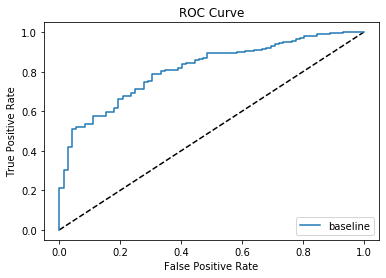

In [21]:
# use logistic regression model as baseline
model = LogisticRegression()
#train the model
model.fit(X_train, y_train)
#test the model
y_pred = model.predict(X_test)
#get the prediction probability to plot the ROC curve
y_pred_prob = model.predict_proba(X_test)[:,1]
print('accuracy:', accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# fpr_, tpr_, thresholds_ = roc_curve(y_test_anti_age, y_pred_prob_age)



# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr , label='baseline')
# plt.plot(fpr_, tpr_, label='sex attr neglected')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Fairness Testing

Anti-Classification

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Other debtors / guarantors', 'Present residence since', 'Property',
       'Age in years', 'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker'],
      dtype='object')
accuracy: 0.752


C:\Users\udomc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


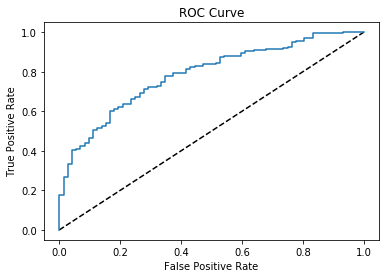

In [22]:
#neglect sex
X_anti_age = df_credit.drop(['target','Personal status and sex'], axis=1)
y_anti_age = df_credit["target"]
print(X_anti_age.columns)
Anti_Classification_model_age = LogisticRegression()
X_train_anti_age, X_test_anti_age, y_train_anti_age, y_test_anti_age = train_test_split(X_anti_age, y_anti_age, test_size = 0.25, random_state=42)
Anti_Classification_model_age.fit(X_train_anti_age, y_train_anti_age)
y_pred_age = Anti_Classification_model_age.predict(X_test_anti_age)
y_pred_prob_age = Anti_Classification_model_age.predict_proba(X_test_anti_age)[:,1]
print('accuracy:', accuracy_score(y_test_anti_age, y_pred_age))
fpr, tpr, thresholds = roc_curve(y_test_anti_age, y_pred_prob_age)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


accuracy: 0.756


C:\Users\udomc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


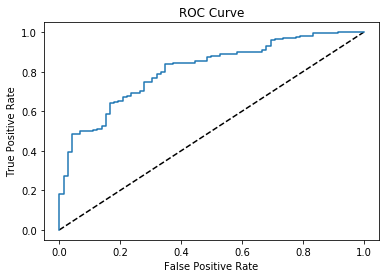

In [23]:
# neglect age
X_anti_sex = df_credit.drop(['target', 'Age in years'], axis=1)
y_anti_sex = df_credit["target"]
Anti_Classification_model_sex = LogisticRegression()
X_train_anti_sex, X_test_anti_sex, y_train_anti_sex, y_test_anti_sex = train_test_split(X_anti_sex, y_anti_sex, test_size = 0.25, random_state=42)
Anti_Classification_model_sex.fit(X_train_anti_sex, y_train_anti_sex)
y_pred_sex = Anti_Classification_model_sex.predict(X_test_anti_sex)
y_pred_prob_sex = Anti_Classification_model_sex.predict_proba(X_test_anti_sex)[:,1]
print('accuracy:', accuracy_score(y_test_anti_sex, y_pred_sex))
fpr, tpr, thresholds = roc_curve(y_test_anti_sex, y_pred_prob_sex)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Group Fairness

Splitting Sex first

1    11
0     9
Name: target, dtype: int64
0: 0.45
1: 0.55
original accuracy: 0.7
Accuracy is 70.0
modified 1 ratio: 0.7 modified 0: 0.3
modified accuracy: 0.65
Accuracy is 65.0


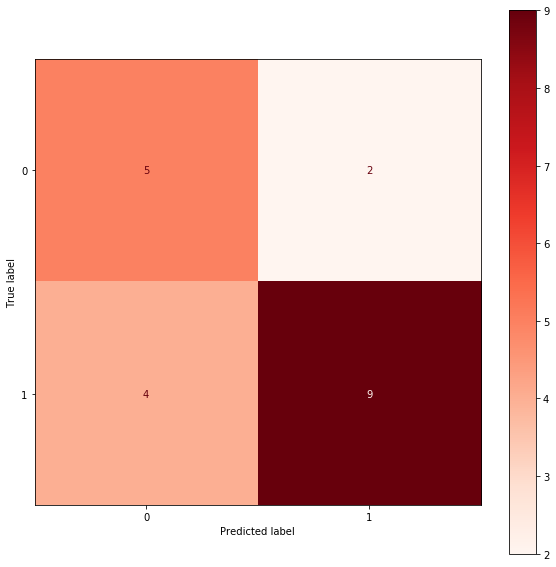

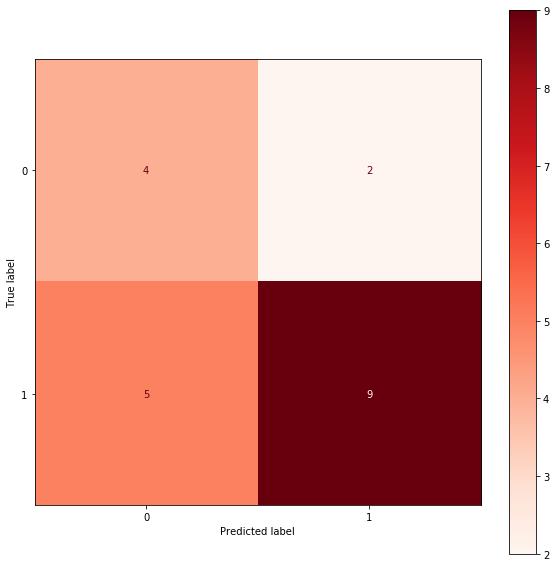

In [28]:


X_test['target'] = y_test
X_test_0 = X_test[X_test["Personal status and sex"]==0]
y_test_0_s = X_test_0['target']

print(X_test_0['target'].value_counts())
print('0:', X_test_0['target'].value_counts()[0]/(X_test_0['target'].value_counts()[0]+X_test_0['target'].value_counts()[1]))
print('1:', X_test_0['target'].value_counts()[1]/(X_test_0['target'].value_counts()[0]+X_test_0['target'].value_counts()[1]))
X_test_0 = X_test_0.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_0)
        

print('original accuracy:', accuracy_score(y_test_0_s, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_0_s) #y_test_0, y_pred_sex_if

#get the pred prob and set threshold to fairness
y_pred_prob_sex = model.predict_proba(X_test_0)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.49 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_0_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_0_s, y_pred_sex_if_0_s))
confusion_matrix_and_visualize(y_pred_sex_if_0_s,y_test_0_s)


1    51
0    22
Name: target, dtype: int64
0: 0.3013698630136986
1: 0.6986301369863014
accuracy: 0.726027397260274
Accuracy is 72.6027397260274
modified 1 ratio: 0.6986301369863014 modified 0: 0.3013698630136986
modified accuracy: 0.726027397260274
Accuracy is 72.6027397260274


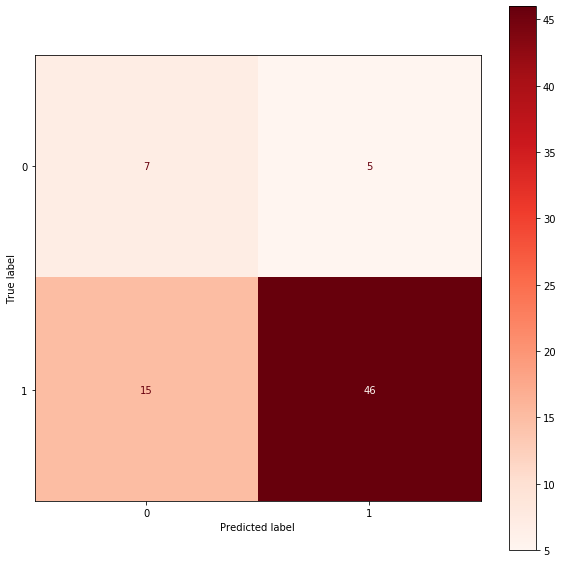

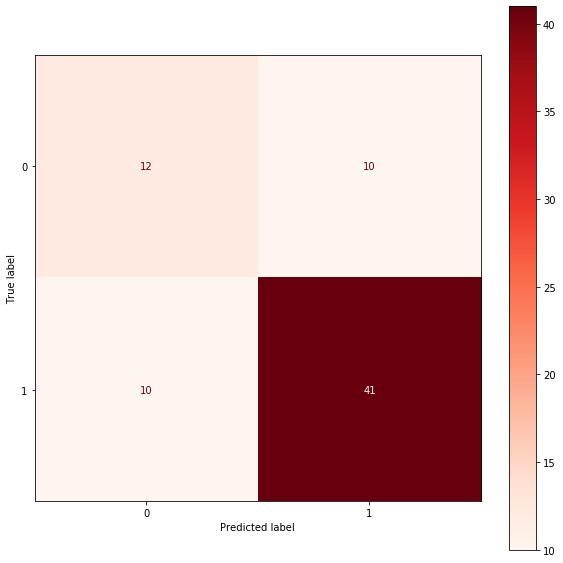

In [29]:
# Sex class 1
X_test['target'] = y_test
X_test_1 = X_test[X_test["Personal status and sex"]==1]
y_test_1_s = X_test_1['target']
print(X_test_1['target'].value_counts())
print('0:', X_test_1['target'].value_counts()[0]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
print('1:', X_test_1['target'].value_counts()[1]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
X_test_1 = X_test_1.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_1)
print('accuracy:', accuracy_score(y_test_1_s, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_1_s) 
#get the pred prob and set threshold to fairness
y_pred_prob_sex = model.predict_proba(X_test_1)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.67 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_1_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_1_s, y_pred_sex_if_1_s))
confusion_matrix_and_visualize(y_pred_sex_if_1_s,y_test_1_s) 

0: 0.26865671641791045
1: 0.7313432835820896
accuracy: 0.7835820895522388
Accuracy is 78.35820895522389
modified 1 ratio: 0.7014925373134329 modified 0: 0.29850746268656714
modified accuracy: 0.7611940298507462
Accuracy is 76.11940298507463


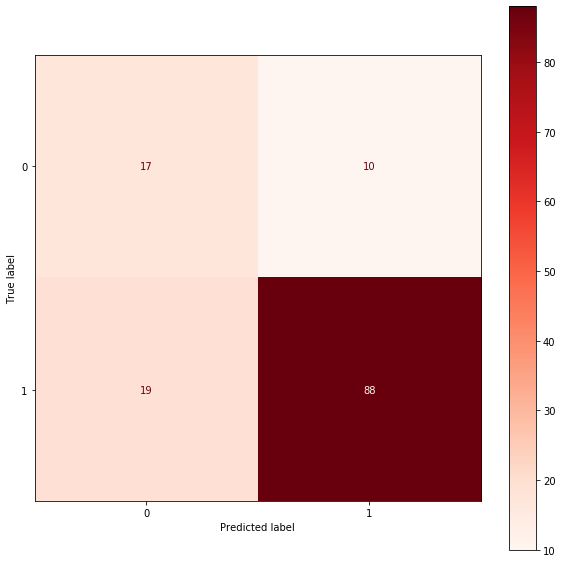

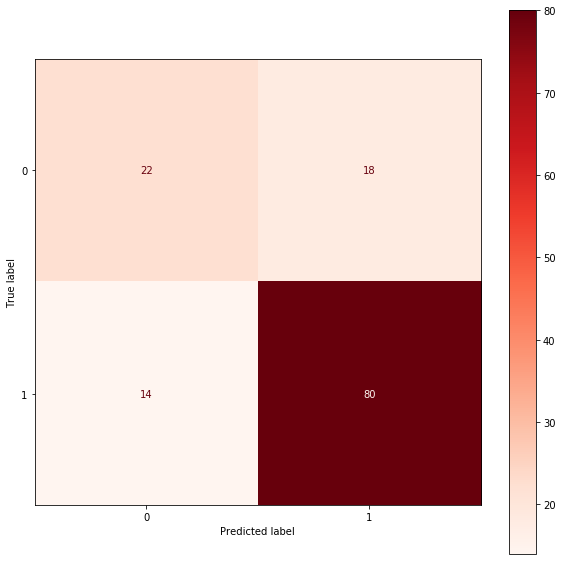

In [31]:
#sex class 2
X_test['target'] = y_test
X_test_2 = X_test[X_test["Personal status and sex"]==2]
y_test_2_s = X_test_2['target']
print('0:', X_test_2['target'].value_counts()[0]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
print('1:', X_test_2['target'].value_counts()[1]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
X_test_2 = X_test_2.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_2)

print('accuracy:', accuracy_score(y_test_2_s, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_2_s) 
y_pred_prob_sex = model.predict_proba(X_test_2)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.59 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_2_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_2_s, y_pred_sex_if_2_s))
confusion_matrix_and_visualize(y_pred_sex_if_2_s,y_test_2_s) 

1    18
0     5
Name: target, dtype: int64
0: 0.21739130434782608
1: 0.782608695652174
accuracy: 0.782608695652174
Accuracy is 78.26086956521739
modified 1 ratio: 0.6956521739130435 modified 0: 0.30434782608695654
modified accuracy: 0.8260869565217391
Accuracy is 82.6086956521739


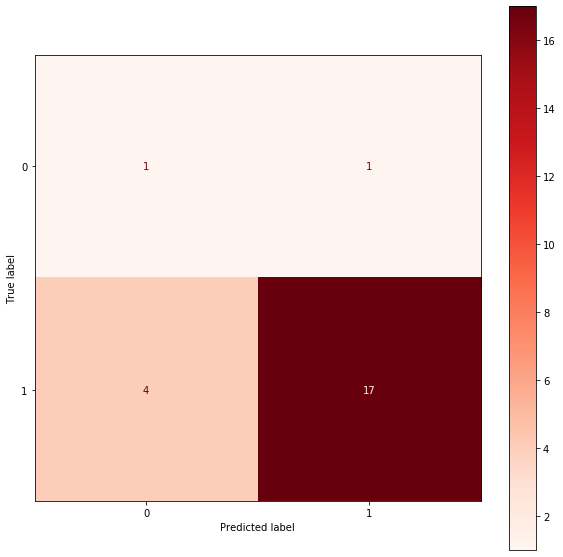

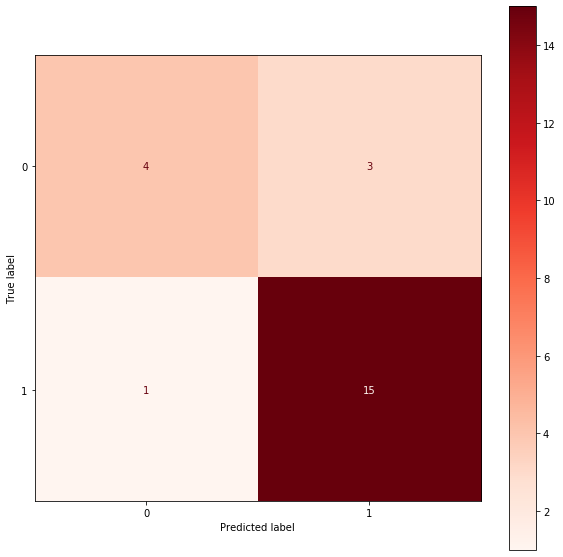

In [32]:
# 2= A93 male : single
# 1=A92 female : divorced/separated/married
# 0=A91  male : divorced/separated
# 3=A94 male : married/widowed
#sex class 3
X_test['target'] = y_test
X_test_3 = X_test[X_test["Personal status and sex"]==3]
y_test_3_s = X_test_3['target']
print(X_test_3['target'].value_counts())
print('0:', X_test_3['target'].value_counts()[0]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
print('1:', X_test_3['target'].value_counts()[1]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
X_test_3 = X_test_3.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_3)
print('accuracy:', accuracy_score(y_test_3_s, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_3_s) 
y_pred_prob_sex = model.predict_proba(X_test_3)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.7 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_3_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_3_s, y_pred_sex_if_3_s))
confusion_matrix_and_visualize(y_pred_sex_if_3_s,y_test_3_s) 

Splitting Age

I decided to split into 4 groups of age for the sake of simplicity

In [33]:
interval = (18, 25, 35, 60, 120)

#  ['Students', 'Early-Careers', 'Middle-Age', 'Senior']
cats = [1, 2, 3, 4]
df_credit["Age_cat"] = pd.cut(df_credit['Age in years'], interval, labels=cats)

X_age = df_credit.drop(['target'], axis=1)
y_age = df_credit["target"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_age, y_age, test_size = 0.25, random_state=42)

In [35]:
X_test

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Age_cat
521,0,13,2,4,3190,0,2,2,1,0,...,0,24,2,1,1,2,1,0,0,1
737,0,13,2,0,4380,1,2,3,2,0,...,2,35,2,1,1,1,2,1,0,2
740,0,17,1,0,2325,1,3,2,2,0,...,2,32,0,1,1,2,1,0,0,2
660,2,8,2,4,1297,0,2,3,3,0,...,0,23,2,0,1,2,1,0,0,1
411,3,22,4,1,7253,0,3,3,2,0,...,2,35,2,1,2,3,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,10,2,9,1410,2,4,1,3,0,...,0,35,2,1,1,2,1,1,0,2
430,3,1,2,9,3448,0,3,1,2,0,...,0,74,2,1,1,1,1,0,0,4
77,1,7,3,4,4771,0,3,2,2,0,...,1,51,2,1,1,2,1,0,0,3
84,0,6,2,4,2315,0,4,3,2,0,...,0,52,2,1,1,1,1,0,0,3


1    34
0    17
Name: target, dtype: int64
0: 0.3333333333333333
1: 0.6666666666666666
51
original accuracy: 0.7450980392156863
Accuracy is 74.50980392156863


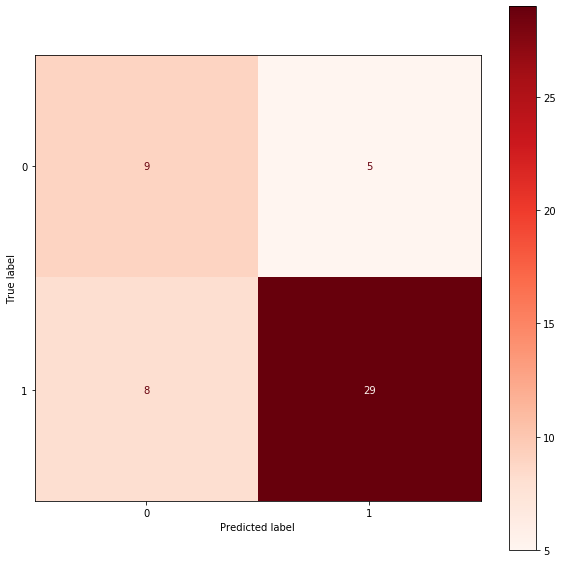

In [36]:
# 2= A93 male : single
# 1=A92 female : divorced/separated/married
# 0=A91  male : divorced/separated
# 3=A94 male : married/widowed

#age class 1
X_test['target'] = y_test
X_test_1 = X_test[X_test["Age_cat"]==1]
y_test_1_a = X_test_1['target']
print(X_test_1['target'].value_counts())
print('0:', X_test_1['target'].value_counts()[0]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
print('1:', X_test_1['target'].value_counts()[1]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
X_test_1 = X_test_1.drop(['target', 'Age_cat'], axis=1)

y_pred_sex_ = model.predict(X_test_1)
print(len(X_test_1))
        

print('original accuracy:', accuracy_score(y_test_1_a, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_1_a)
# #get the pred prob and set threshold to fairness
# y_pred_prob_sex = model.predict_proba(X_test_1)[:,1]
# y_pred_sex_if =[]
# for x in y_pred_prob_sex:
#     pred_prob = 1 if x>=0.5 else 0
#     y_pred_sex_if.append(pred_prob)
    
# # cal the percentage of good for prediction
# print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
# y_pred_sex_if_1_a = y_pred_sex_if
# print('modified accuracy:', accuracy_score(y_test_1_a, y_pred_sex_if_1_a))

1    69
0    25
Name: target, dtype: int64
0: 0.26595744680851063
1: 0.7340425531914894
94
original accuracy: 0.7446808510638298
Accuracy is 74.46808510638297


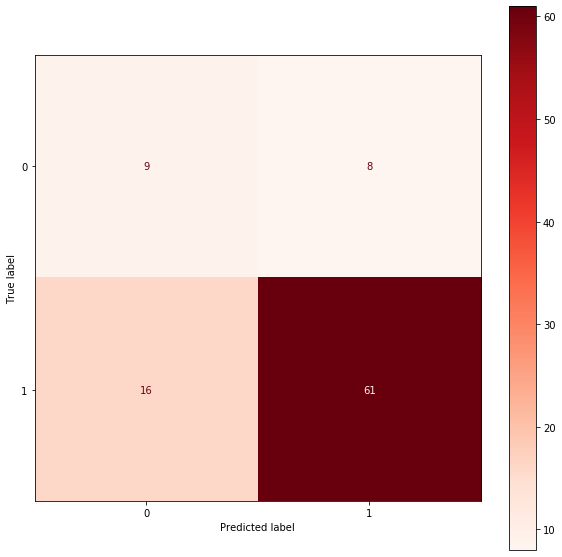

In [40]:
#age class 1

X_test['target'] = y_test
X_test_2 = X_test[X_test["Age_cat"]==2]
y_test_2_a = X_test_2['target']
print(X_test_2['target'].value_counts())
print('0:', X_test_2['target'].value_counts()[0]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
print('1:', X_test_2['target'].value_counts()[1]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
X_test_2 = X_test_2.drop(['target', 'Age_cat'], axis=1)

y_pred_sex_ = model.predict(X_test_2)
print(len(X_test_2))

print('original accuracy:', accuracy_score(y_test_2_a, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_2_a)


1    67
0    25
Name: target, dtype: int64
0: 0.2717391304347826
1: 0.7282608695652174
92
original accuracy: 0.7934782608695652
Accuracy is 79.34782608695652


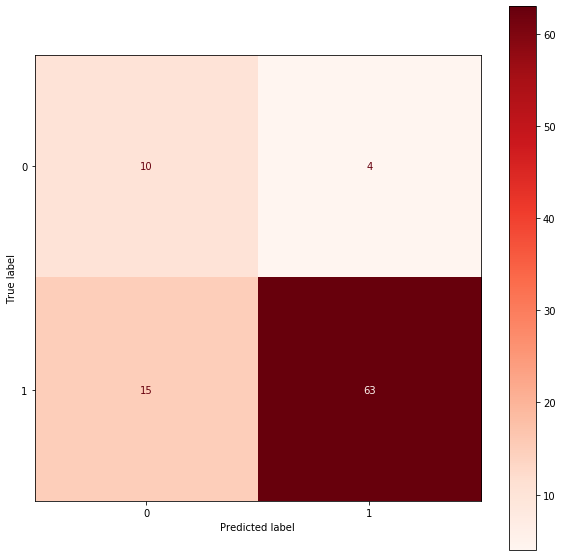

In [41]:
#age class 3

X_test['target'] = y_test
X_test_3 = X_test[X_test["Age_cat"]==3]
y_test_3_a = X_test_3['target']
print(X_test_3['target'].value_counts())
print('0:', X_test_3['target'].value_counts()[0]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
print('1:', X_test_3['target'].value_counts()[1]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
X_test_3 = X_test_3.drop(['target', 'Age_cat'], axis=1)

y_pred_sex_ = model.predict(X_test_3)
print(len(X_test_3))
        

print('original accuracy:', accuracy_score(y_test_3_a, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_3_a)

1    8
0    5
Name: target, dtype: int64
0: 0.38461538461538464
1: 0.6153846153846154
13
original accuracy: 0.6923076923076923
Accuracy is 69.23076923076923


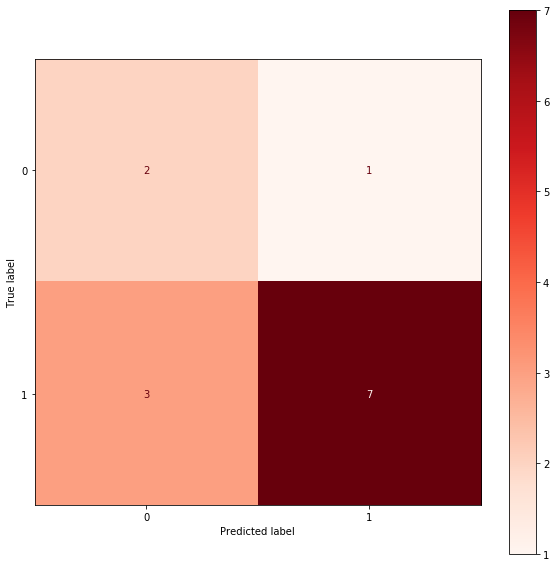

In [42]:
#age class 4

X_test['target'] = y_test
X_test_4 = X_test[X_test["Age_cat"]==4]
y_test_4_a = X_test_4['target']
print(X_test_4['target'].value_counts())
print('0:', X_test_4['target'].value_counts()[0]/(X_test_4['target'].value_counts()[0]+X_test_4['target'].value_counts()[1]))
print('1:', X_test_4['target'].value_counts()[1]/(X_test_4['target'].value_counts()[0]+X_test_4['target'].value_counts()[1]))
X_test_4 = X_test_4.drop(['target', 'Age_cat'], axis=1)

y_pred_sex_ = model.predict(X_test_4)
print(len(X_test_4))
        

print('original accuracy:', accuracy_score(y_test_4_a, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_4_a)

# Seperation

0.5555555555555556
0.18181818181818182
1    11
0     9
Name: target, dtype: int64
0: 0.45
1: 0.55
original accuracy: 0.7
modified 1 ratio: 0.7 modified 0: 0.3
modified accuracy: 0.65
Accuracy is 65.0


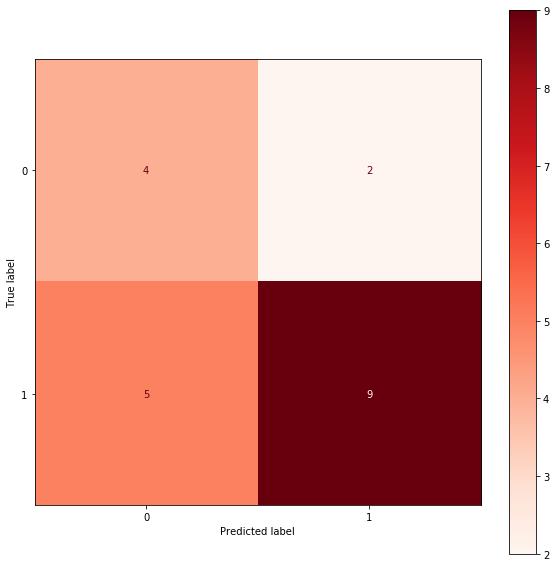

In [502]:
#sex 1  
fpr = 5/(5+4)
print(fpr)
fnr = 2/(9+2)
print(fnr)

X_test['target'] = y_test
X_test_0 = X_test[X_test["Personal status and sex"]==0]
y_test_0_s = X_test_0['target']
print(X_test_0['target'].value_counts())
print('0:', X_test_0['target'].value_counts()[0]/(X_test_0['target'].value_counts()[0]+X_test_0['target'].value_counts()[1]))
print('1:', X_test_0['target'].value_counts()[1]/(X_test_0['target'].value_counts()[0]+X_test_0['target'].value_counts()[1]))
X_test_0 = X_test_0.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_0)
        

print('original accuracy:', accuracy_score(y_test_0_s, y_pred_sex_))

#get the pred prob and set threshold to fairness
y_pred_prob_sex = model.predict_proba(X_test_0)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.485 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_0_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_0_s, y_pred_sex_if_0_s))

confusion_matrix_and_visualize(y_pred_sex_if_0_s,y_test_0_s) #y_test_0, y_pred_sex_if

0.5454545454545454
0.1568627450980392
1    51
0    22
Name: target, dtype: int64
0: 0.3013698630136986
1: 0.6986301369863014
accuracy: 0.726027397260274
modified 1 ratio: 0.7534246575342466 modified 0: 0.2465753424657534
modified accuracy: 0.726027397260274
Accuracy is 72.6027397260274


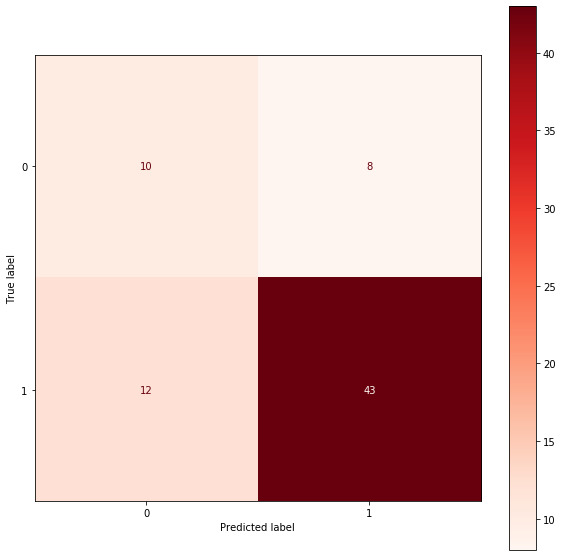

In [515]:
#sex 1 
fpr1 = 12/(10+12)
fnr2 = 8/(43+8)
print(fpr1)
print(fnr2)

X_test['target'] = y_test
X_test_1 = X_test[X_test["Personal status and sex"]==1]
y_test_1_s = X_test_1['target']
print(X_test_1['target'].value_counts())
print('0:', X_test_1['target'].value_counts()[0]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
print('1:', X_test_1['target'].value_counts()[1]/(X_test_1['target'].value_counts()[0]+X_test_1['target'].value_counts()[1]))
X_test_1 = X_test_1.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_1)
print('accuracy:', accuracy_score(y_test_1_s, y_pred_sex_))

#get the pred prob and set threshold to fairness
y_pred_prob_sex = model.predict_proba(X_test_1)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.62 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_1_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_1_s, y_pred_sex_if_1_s))

confusion_matrix_and_visualize(y_pred_sex_if_1_s,y_test_1_s) #y_test_0, y_pred_sex_if

0.5277777777777778
0.11224489795918367
0: 0.26865671641791045
1: 0.7313432835820896
modified 1 ratio: 0.7910447761194029 modified 0: 0.208955223880597
modified accuracy: 0.7761194029850746
Accuracy is 77.61194029850746


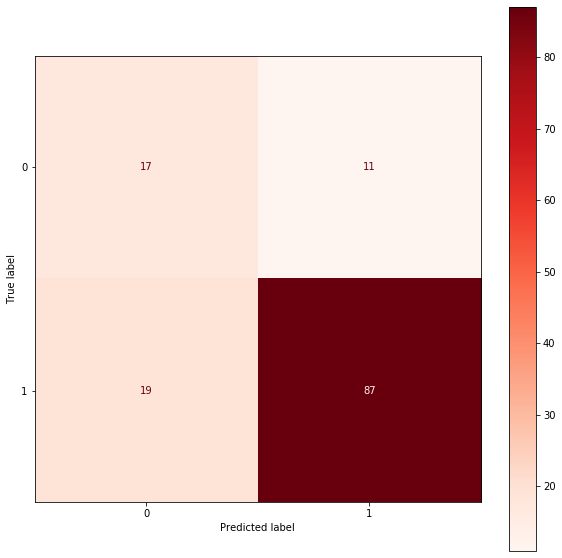

In [531]:
#sex 2
fpr1 = 19/(19+17)
fnr2 =11/(11+87)
print(fpr1)
print(fnr2)

X_test['target'] = y_test
X_test_2 = X_test[X_test["Personal status and sex"]==2]
y_test_2_s = X_test_2['target']
print('0:', X_test_2['target'].value_counts()[0]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
print('1:', X_test_2['target'].value_counts()[1]/(X_test_2['target'].value_counts()[0]+X_test_2['target'].value_counts()[1]))
X_test_2 = X_test_2.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_2)

# confusion_matrix_and_visualize(y_pred_sex_,y_test_2_s) 
y_pred_prob_sex = model.predict_proba(X_test_2)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.52 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_2_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_2_s, y_pred_sex_if_2_s))
confusion_matrix_and_visualize(y_pred_sex_if_2_s,y_test_2_s) 


0.6
0.05555555555555555
1    18
0     5
Name: target, dtype: int64
0: 0.21739130434782608
1: 0.782608695652174
accuracy: 0.782608695652174
Accuracy is 78.26086956521739
modified 1 ratio: 0.8695652173913043 modified 0: 0.13043478260869565
modified accuracy: 0.8260869565217391
Accuracy is 82.6086956521739


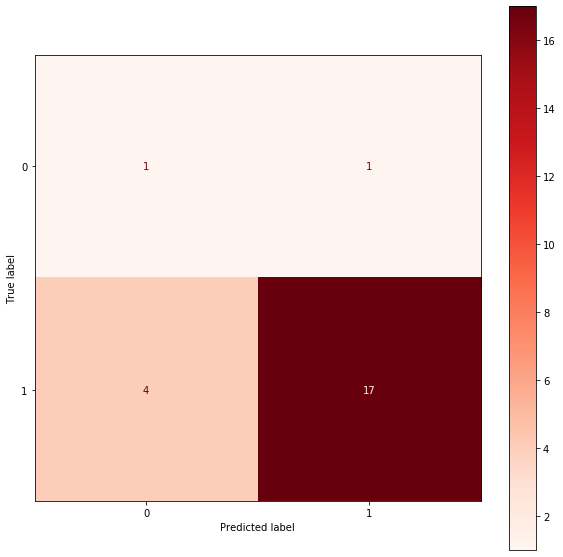

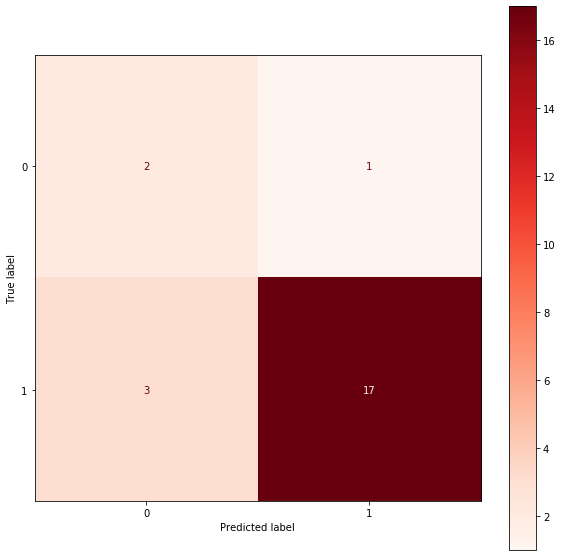

In [566]:
#sex 3
fpr1 = 3/(2+3)
fnr2 = 1/(17+1)
print(fpr1)
print(fnr2)

X_test['target'] = y_test
X_test_3 = X_test[X_test["Personal status and sex"]==3]
y_test_3_s = X_test_3['target']
print(X_test_3['target'].value_counts())
print('0:', X_test_3['target'].value_counts()[0]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
print('1:', X_test_3['target'].value_counts()[1]/(X_test_3['target'].value_counts()[0]+X_test_3['target'].value_counts()[1]))
X_test_3 = X_test_3.drop(['target'], axis=1)
y_pred_sex_ = model.predict(X_test_3)
print('accuracy:', accuracy_score(y_test_3_s, y_pred_sex_))
confusion_matrix_and_visualize(y_pred_sex_,y_test_3_s) 
y_pred_prob_sex = model.predict_proba(X_test_3)[:,1]
y_pred_sex_if =[]
for x in y_pred_prob_sex:
    pred_prob = 1 if x>=0.51 else 0
    y_pred_sex_if.append(pred_prob)
    
# cal the percentage of good for prediction
print('modified 1 ratio:', y_pred_sex_if.count(1)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)), 'modified 0:', y_pred_sex_if.count(0)/(y_pred_sex_if.count(1)+y_pred_sex_if.count(0)))
y_pred_sex_if_3_s =y_pred_sex_if
print('modified accuracy:', accuracy_score(y_test_3_s, y_pred_sex_if_3_s))
confusion_matrix_and_visualize(y_pred_sex_if_3_s,y_test_3_s)